# Lab-09-1 ReLU

In [1]:
import torch

## MNIST Linear

In [2]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [3]:
mnist_train = dsets.MNIST(root="MNIST_data/", train=True, 
    transform=transforms.ToTensor(), download=False)
mnist_test = dsets.MNIST(root="MNIST_data/", train=False, 
    transform=transforms.ToTensor(), download=False)
data_loader = torch.utils.data.DataLoader(mnist_train,
                                          batch_size=64,
                                          shuffle=True,
                                          drop_last=True
                                         )

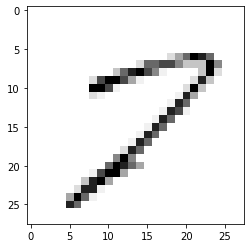

In [4]:
def plot_img(image):
    image = image.numpy()[0]
    plt.imshow(image,cmap='Greys')

sample_data = next(iter(data_loader))
plot_img(sample_data[0][1])

In [5]:
next(iter(data_loader))[0].size()

torch.Size([64, 1, 28, 28])

In [6]:
len(data_loader)

937

In [7]:
learning_rate = 1e-3
n_epochs = 15
n_batches = len(data_loader)

In [8]:
linear = torch.nn.Linear(784, 10, bias=True)
model = torch.nn.Sequential(linear)

In [9]:
torch.nn.init.normal_(linear.weight)

Parameter containing:
tensor([[-0.1254, -1.0860,  0.0894,  ...,  0.7850,  0.9955, -1.0781],
        [-0.5229,  2.3278,  0.6915,  ...,  0.1851,  0.1066,  1.4715],
        [-0.5179, -0.8157,  1.4704,  ...,  0.4123, -1.0399, -0.2208],
        ...,
        [ 1.6477, -0.3893,  0.6379,  ..., -0.6210,  0.9640,  0.4377],
        [ 0.5657,  2.7322, -0.8999,  ..., -0.0626, -0.7807, -1.1064],
        [-1.2485, -1.3255, -0.5951,  ...,  0.5228, -0.5902,  1.6307]],
       requires_grad=True)

In [10]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(linear.parameters(), lr=learning_rate)

In [11]:
for epoch in range(n_epochs):
    avg_loss = 0
    for X, Y in data_loader:
        X = X.view(-1, 784)
        optimizer.zero_grad()
        output = model(X)
        loss = criterion(output, Y)
        loss.backward()
        optimizer.step()
        avg_loss += loss / n_batches
    
    print("Epoch: {} Cost: {}".format(epoch+1, avg_loss))

Epoch: 1 Cost: 4.46505880355835
Epoch: 2 Cost: 1.2754671573638916
Epoch: 3 Cost: 0.897098958492279
Epoch: 4 Cost: 0.7334251403808594
Epoch: 5 Cost: 0.6384686231613159
Epoch: 6 Cost: 0.5755305886268616
Epoch: 7 Cost: 0.5304577946662903
Epoch: 8 Cost: 0.4962708652019501
Epoch: 9 Cost: 0.46856197714805603
Epoch: 10 Cost: 0.4458995759487152
Epoch: 11 Cost: 0.4276565611362457
Epoch: 12 Cost: 0.4111380875110626
Epoch: 13 Cost: 0.39811065793037415
Epoch: 14 Cost: 0.3857385218143463
Epoch: 15 Cost: 0.3749738931655884


In [12]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 784).float()
    Y_test = mnist_test.test_labels
    
    pred = model(X_test)
    correct_pred = torch.argmax(pred, 1) == Y_test
    accuracy = correct_pred.float().mean()
    print("Accuracy: {}".format(accuracy.item()))

Accuracy: 0.888700008392334


C:\Users\user\Anaconda3\envs\nlp\lib\site-packages\torchvision\datasets\mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\Users\user\Anaconda3\envs\nlp\lib\site-packages\torchvision\datasets\mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [13]:
r = random.randint(0, len(mnist_test)-1)
X_single_data = mnist_test.test_data[r:r+1].view(-1, 784).float()
Y_single_data = mnist_test.test_labels[r:r+1]

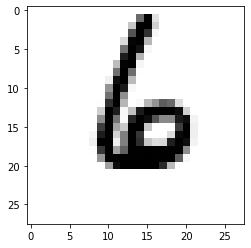

Prediction: 6
Label: 6


In [14]:
plt.imshow(mnist_test.test_data[r:r+1].view(28, 28),
           cmap="Greys", interpolation="nearest")
plt.show()

single_pred = model(X_single_data)
print("Prediction: {}".format(torch.argmax(single_pred, 1).item()))
print("Label: {}".format(Y_single_data.item()))

## MNIST NN

In [15]:
linear1 = torch.nn.Linear(784, 256, bias=True)
linear2 = torch.nn.Linear(256, 256, bias=True)
linear3 = torch.nn.Linear(256, 10, bias=True)
relu = torch.nn.ReLU()

torch.nn.init.normal_(linear1.weight)
torch.nn.init.normal_(linear2.weight)
torch.nn.init.normal_(linear3.weight)

model = torch.nn.Sequential(linear1, relu, 
                            linear2, relu, 
                            linear3)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [16]:
for epoch in range(n_epochs):
    avg_loss = 0
    for X, Y in data_loader:
        X = X.view(-1, 784)
        optimizer.zero_grad()
        output = model(X)
        loss = criterion(output, Y)
        loss.backward()
        optimizer.step()
        avg_loss += loss / n_batches
    
    print("Epoch: {} Cost: {}".format(epoch+1, avg_loss))

Epoch: 1 Cost: 117.457275390625
Epoch: 2 Cost: 31.411104202270508
Epoch: 3 Cost: 19.11423683166504
Epoch: 4 Cost: 12.753639221191406
Epoch: 5 Cost: 8.81065559387207
Epoch: 6 Cost: 6.160829067230225
Epoch: 7 Cost: 4.364480018615723
Epoch: 8 Cost: 3.1476540565490723
Epoch: 9 Cost: 2.4133176803588867
Epoch: 10 Cost: 1.8548959493637085
Epoch: 11 Cost: 1.4111295938491821
Epoch: 12 Cost: 1.0138040781021118
Epoch: 13 Cost: 0.8798877596855164
Epoch: 14 Cost: 0.8263136148452759
Epoch: 15 Cost: 0.578014612197876


In [17]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 784).float()
    Y_test = mnist_test.test_labels
    
    pred = model(X_test)
    correct_pred = torch.argmax(pred, 1) == Y_test
    accuracy = correct_pred.float().mean()
    print("Accuracy: {}".format(accuracy.item()))

Accuracy: 0.9470000267028809


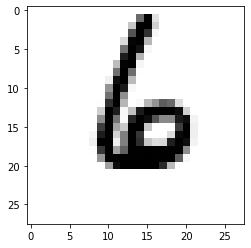

Prediction: 6
Label: 6


In [18]:
plt.imshow(mnist_test.test_data[r:r+1].view(28, 28),
           cmap="Greys", interpolation="nearest")
plt.show()

single_pred = model(X_single_data)
print("Prediction: {}".format(torch.argmax(single_pred, 1).item()))
print("Label: {}".format(Y_single_data.item()))